<a id=problem></a>


_Notebook Overview:_ This notebook creates 4 different basic models with basic feature tuning for PIMA diabetes dataset. We get logistic regression at 93% Recall/Sensitivity. We also get KNN at 83% accuracy. 

## DESCRIPTION

### Problem Statement
- NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
- The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
- Build a model to accurately predict whether the patients in the dataset have diabetes or not.

### Dataset Description
The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

|Variables | Description|
|----------|-------------|
|Pregnancies|Number of times pregnant|
|Glucose|	Plasma glucose concentration in an oral glucose tolerance test|
|BloodPressure |	Diastolic blood pressure (mm Hg)|
|SkinThickness |	Triceps skinfold thickness (mm)|
|Insulin |	Two hour serum insulin|
|BMI |	Body Mass Index|
|DiabetesPedigreeFunction|	Diabetes pedigree function|
|Age|	Age in years|
|Outcome|	Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0|

<a id=dc></a>

## I. Data Exploration

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

4. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

5. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

6. Perform correlation analysis. Visually explore it using a heat map.

<a id=dc></a>

## II. Data Modeling

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

3. Compare various models with the results from KNN algorithm.

4. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.

Please be descriptive to explain what values of these parameters you have used.

<a id=dc></a>

## III. Data Reporting

1. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

* Pie chart to describe the diabetic or non-diabetic population.
* Scatter charts between relevant variables to analyze the relationships.
* Histogram or frequency charts to analyze the distribution of the data.
* Heatmap of correlation analysis among the relevant variables.
* Create bins of these age values: 21-25

# Import the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data

In [2]:
data = pd.read_csv('health care diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# I. Data Exploration

### 1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Looking at the data, there are 9 columns and 768 rows. Column "Outcome" is the Target column. The remaining columns are the features that will be used for the analysis.

The data in columns "Glucose", "BloodPressure", "SkinThickness", "Insulin", and "BMI" have 0 values that must be treated. This is based on given information that 0 values in these columns indicate missing values. 

Additionally, the data does not contain categorical data, so no encoding is necessary.

In [7]:
# The below will replace all 0 values in the identified columns with Null Values.

data["Glucose"].replace(to_replace = 0, value = np.NaN, inplace=True)
data["BloodPressure"].replace(to_replace = 0, value = np.NaN, inplace=True)
data["SkinThickness"].replace(to_replace = 0, value = np.NaN, inplace=True)
data["Insulin"].replace(to_replace = 0, value = np.NaN, inplace=True)
data["BMI"].replace(to_replace = 0, value = np.NaN, inplace=True)

In [8]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

As you can see in the Insulin column and SkinThickness column, there were a large number of 0 values. These have now been changed to Null values.

The below code will visually represent the features to understand how they should be treated.

### 2. Visually explore these variables using Histograms. Treat the missing values accordingly.

In [9]:
columns = data.columns

Pregnancies


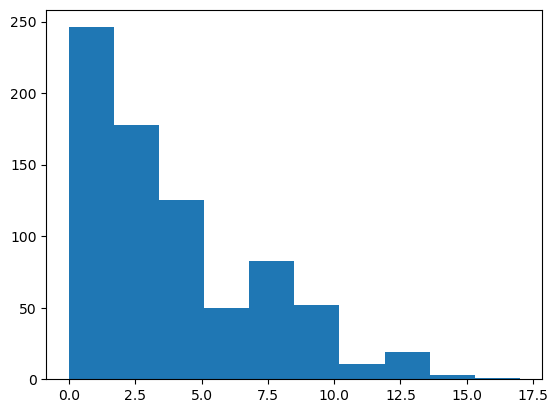

Glucose


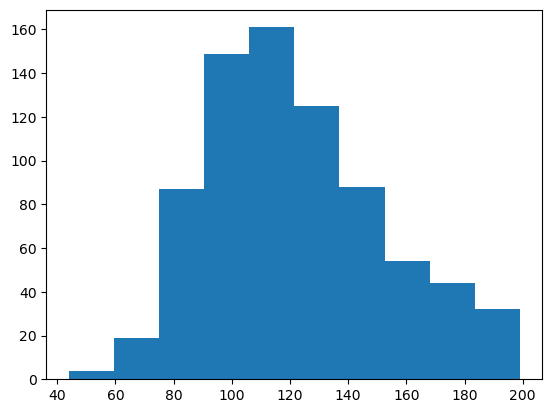

BloodPressure


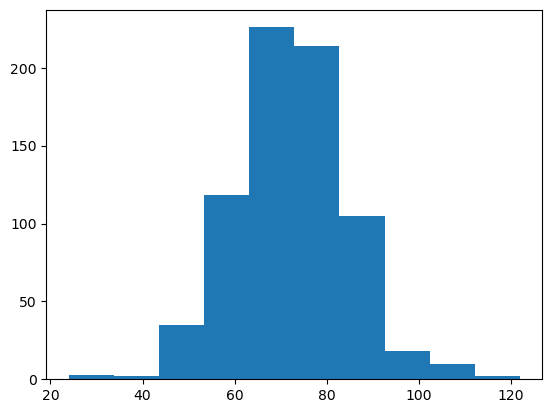

SkinThickness


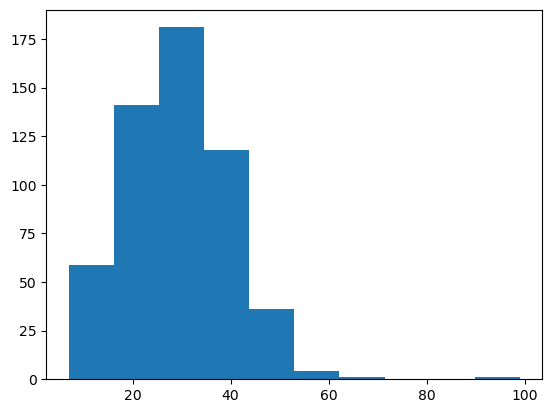

Insulin


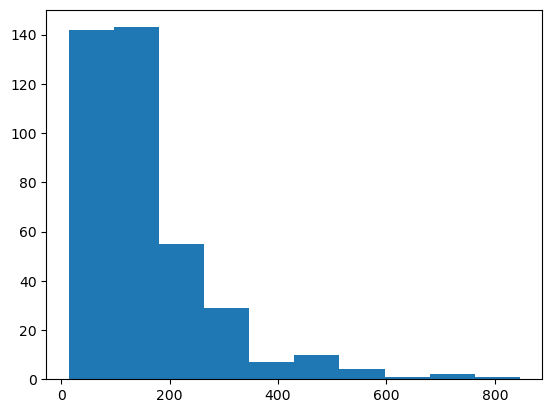

BMI


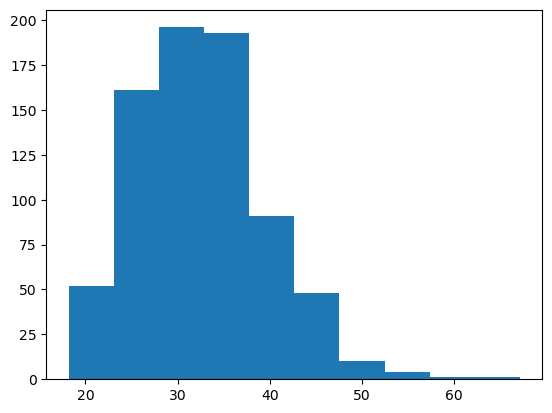

DiabetesPedigreeFunction


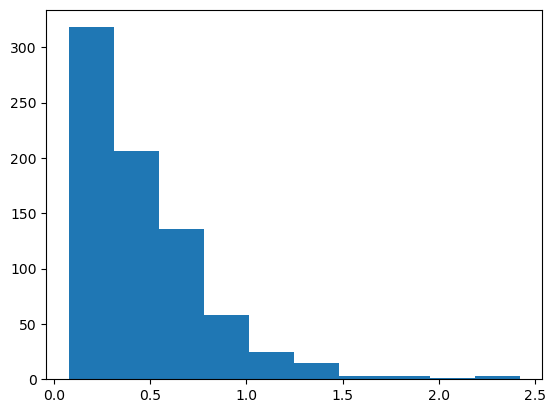

Age


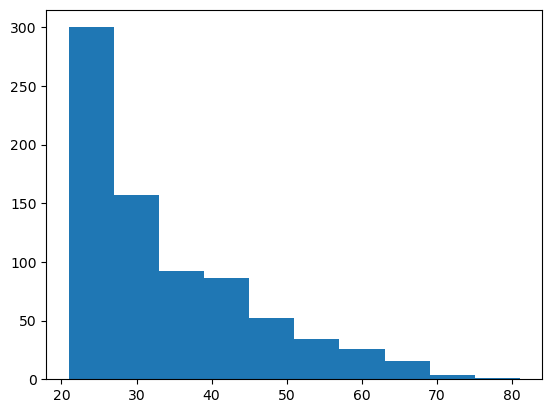

Outcome


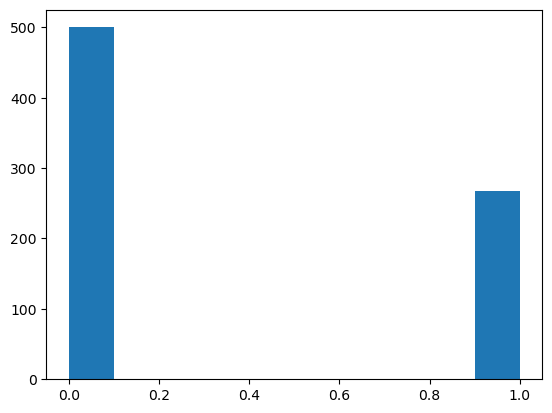

In [10]:
for i in columns:
    print(i)
    new_data = data[i]
    plt.hist(new_data)
    plt.show()

From the above histograms, we can see the following:
* Pregnancies has a distribution that is skewed right with most values under 5.
* Glucose appears to have a normal distribution with a mean/median between 100 and 140.
* BloodPressure appears to have a normal distribution with a mean/median between 60 and 80.
* SkinThickness has a normal distribution with a mean/median between 20 and 40.
* Insulin has a distribution that is skewed right with most values below 200.
* BMI appears to have a normal distribution with a small skew to the right with the mean/median between 30 and 40.
* DiabetesPedigreeFunction has a distribution that is skewed right with most values below 1.0.
* Age has a distribution that is skewed right with most values below 40.
* The outcomes in the data set show more people without diabetes as opposed to those with diabetes.

With regards to treating the data, since Glucose, BloodPressure, SkinThickness, and BMI appear to have normal distributions, the null values in these Features will be replaced with the mean. Insulin is replaced with the median however, since it is rightly skewed.

In [11]:
data["Glucose"].fillna(value = data["Glucose"].mean(), inplace=True)
data["BloodPressure"].fillna(value = data["BloodPressure"].mean(), inplace=True)
data["SkinThickness"].fillna(value = data["SkinThickness"].mean(), inplace=True)
data["BMI"].fillna(value = data["BMI"].mean(), inplace=True)

data["Insulin"].fillna(value = data["Insulin"].median(), inplace=True)

In [12]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

From the above we can now see that all the Null values have been treated and replaced with the mean of the column.

Pregnancies


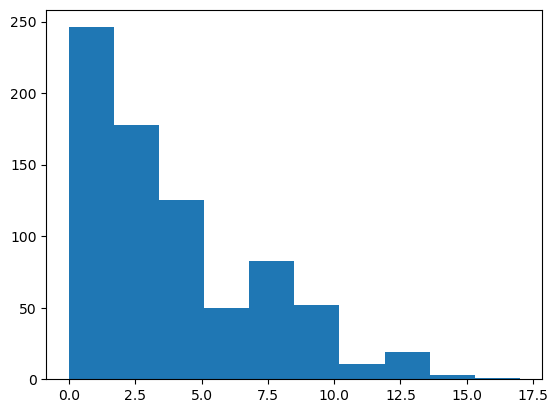

Glucose


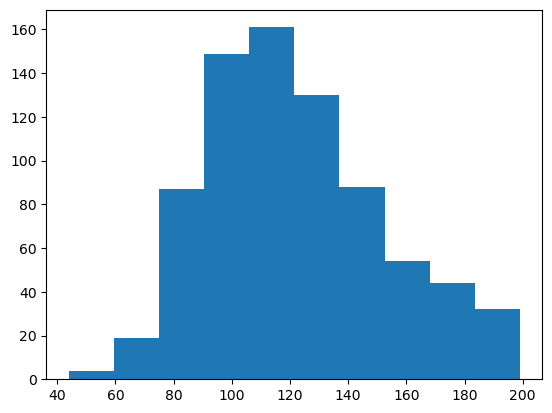

BloodPressure


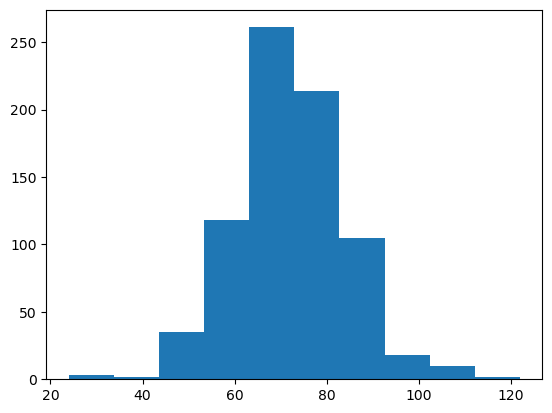

SkinThickness


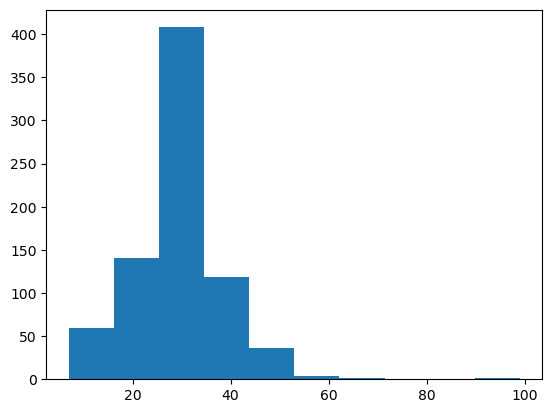

Insulin


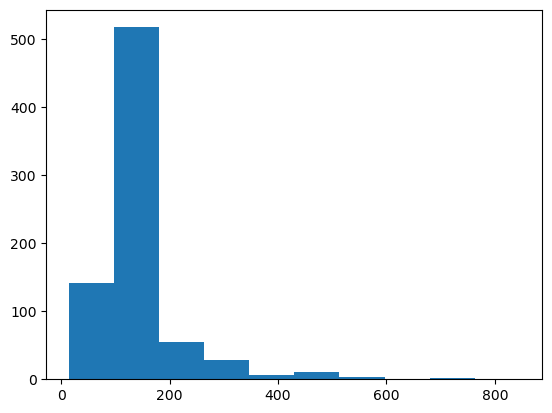

BMI


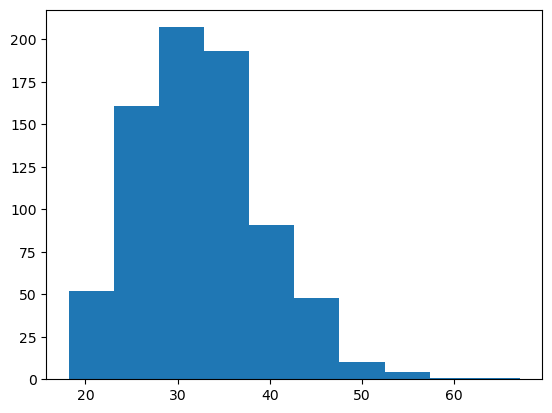

DiabetesPedigreeFunction


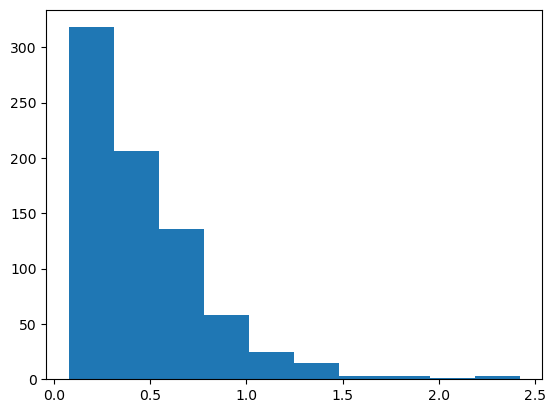

Age


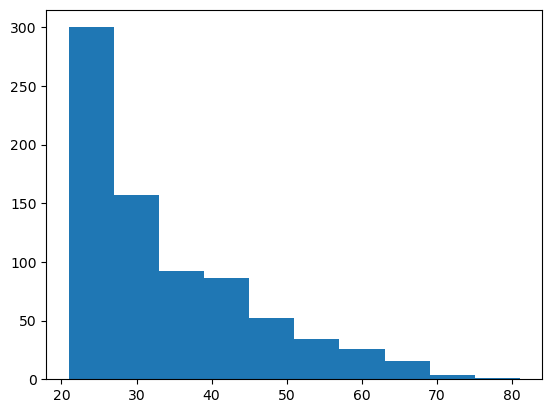

Outcome


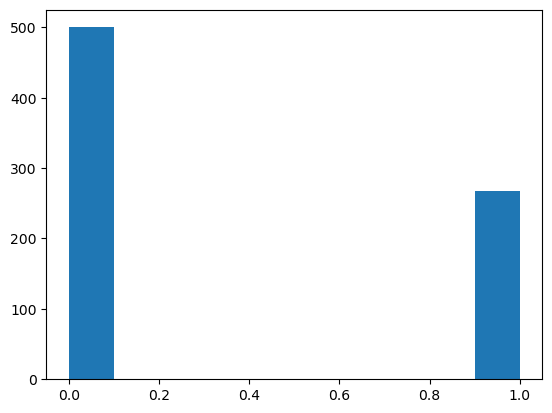

In [13]:
for i in columns:
    print(i)
    new_data = data[i]
    plt.hist(new_data)
    plt.show()

Treating the data has resulted in changes to the visualizations, but the data still keeps its distributions from before.

### 3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables

<AxesSubplot:>

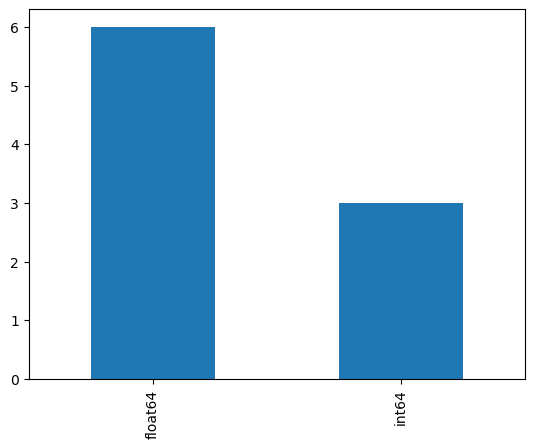

In [14]:
data.dtypes.value_counts().plot(kind='bar')

From the above we see that 6 of the variables are float while 3 are integers.

### 4. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

C:\Users\ricky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

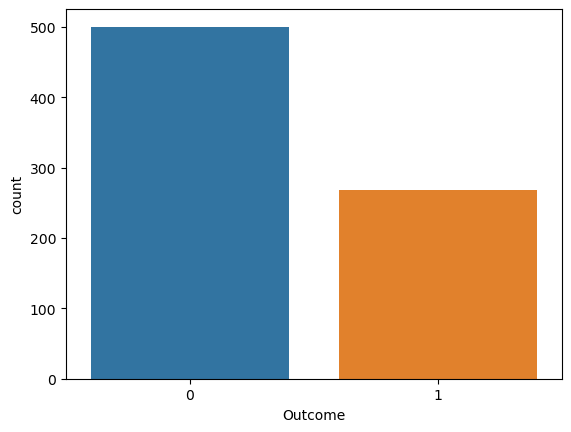

In [15]:
sns.countplot(data.Outcome)

In [16]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

From the above we can see that we have more data for people without diabetes than people with diabetes. We have 500 records of people without diabetes while only having 268 records of people with diabetes. Since there are less cases of people with diabetes, we will need to oversample from this population or undersample from the people without diabetes.

### 5. Create scatter charts between the pari of variables to understand the relationships. Describe your findings.

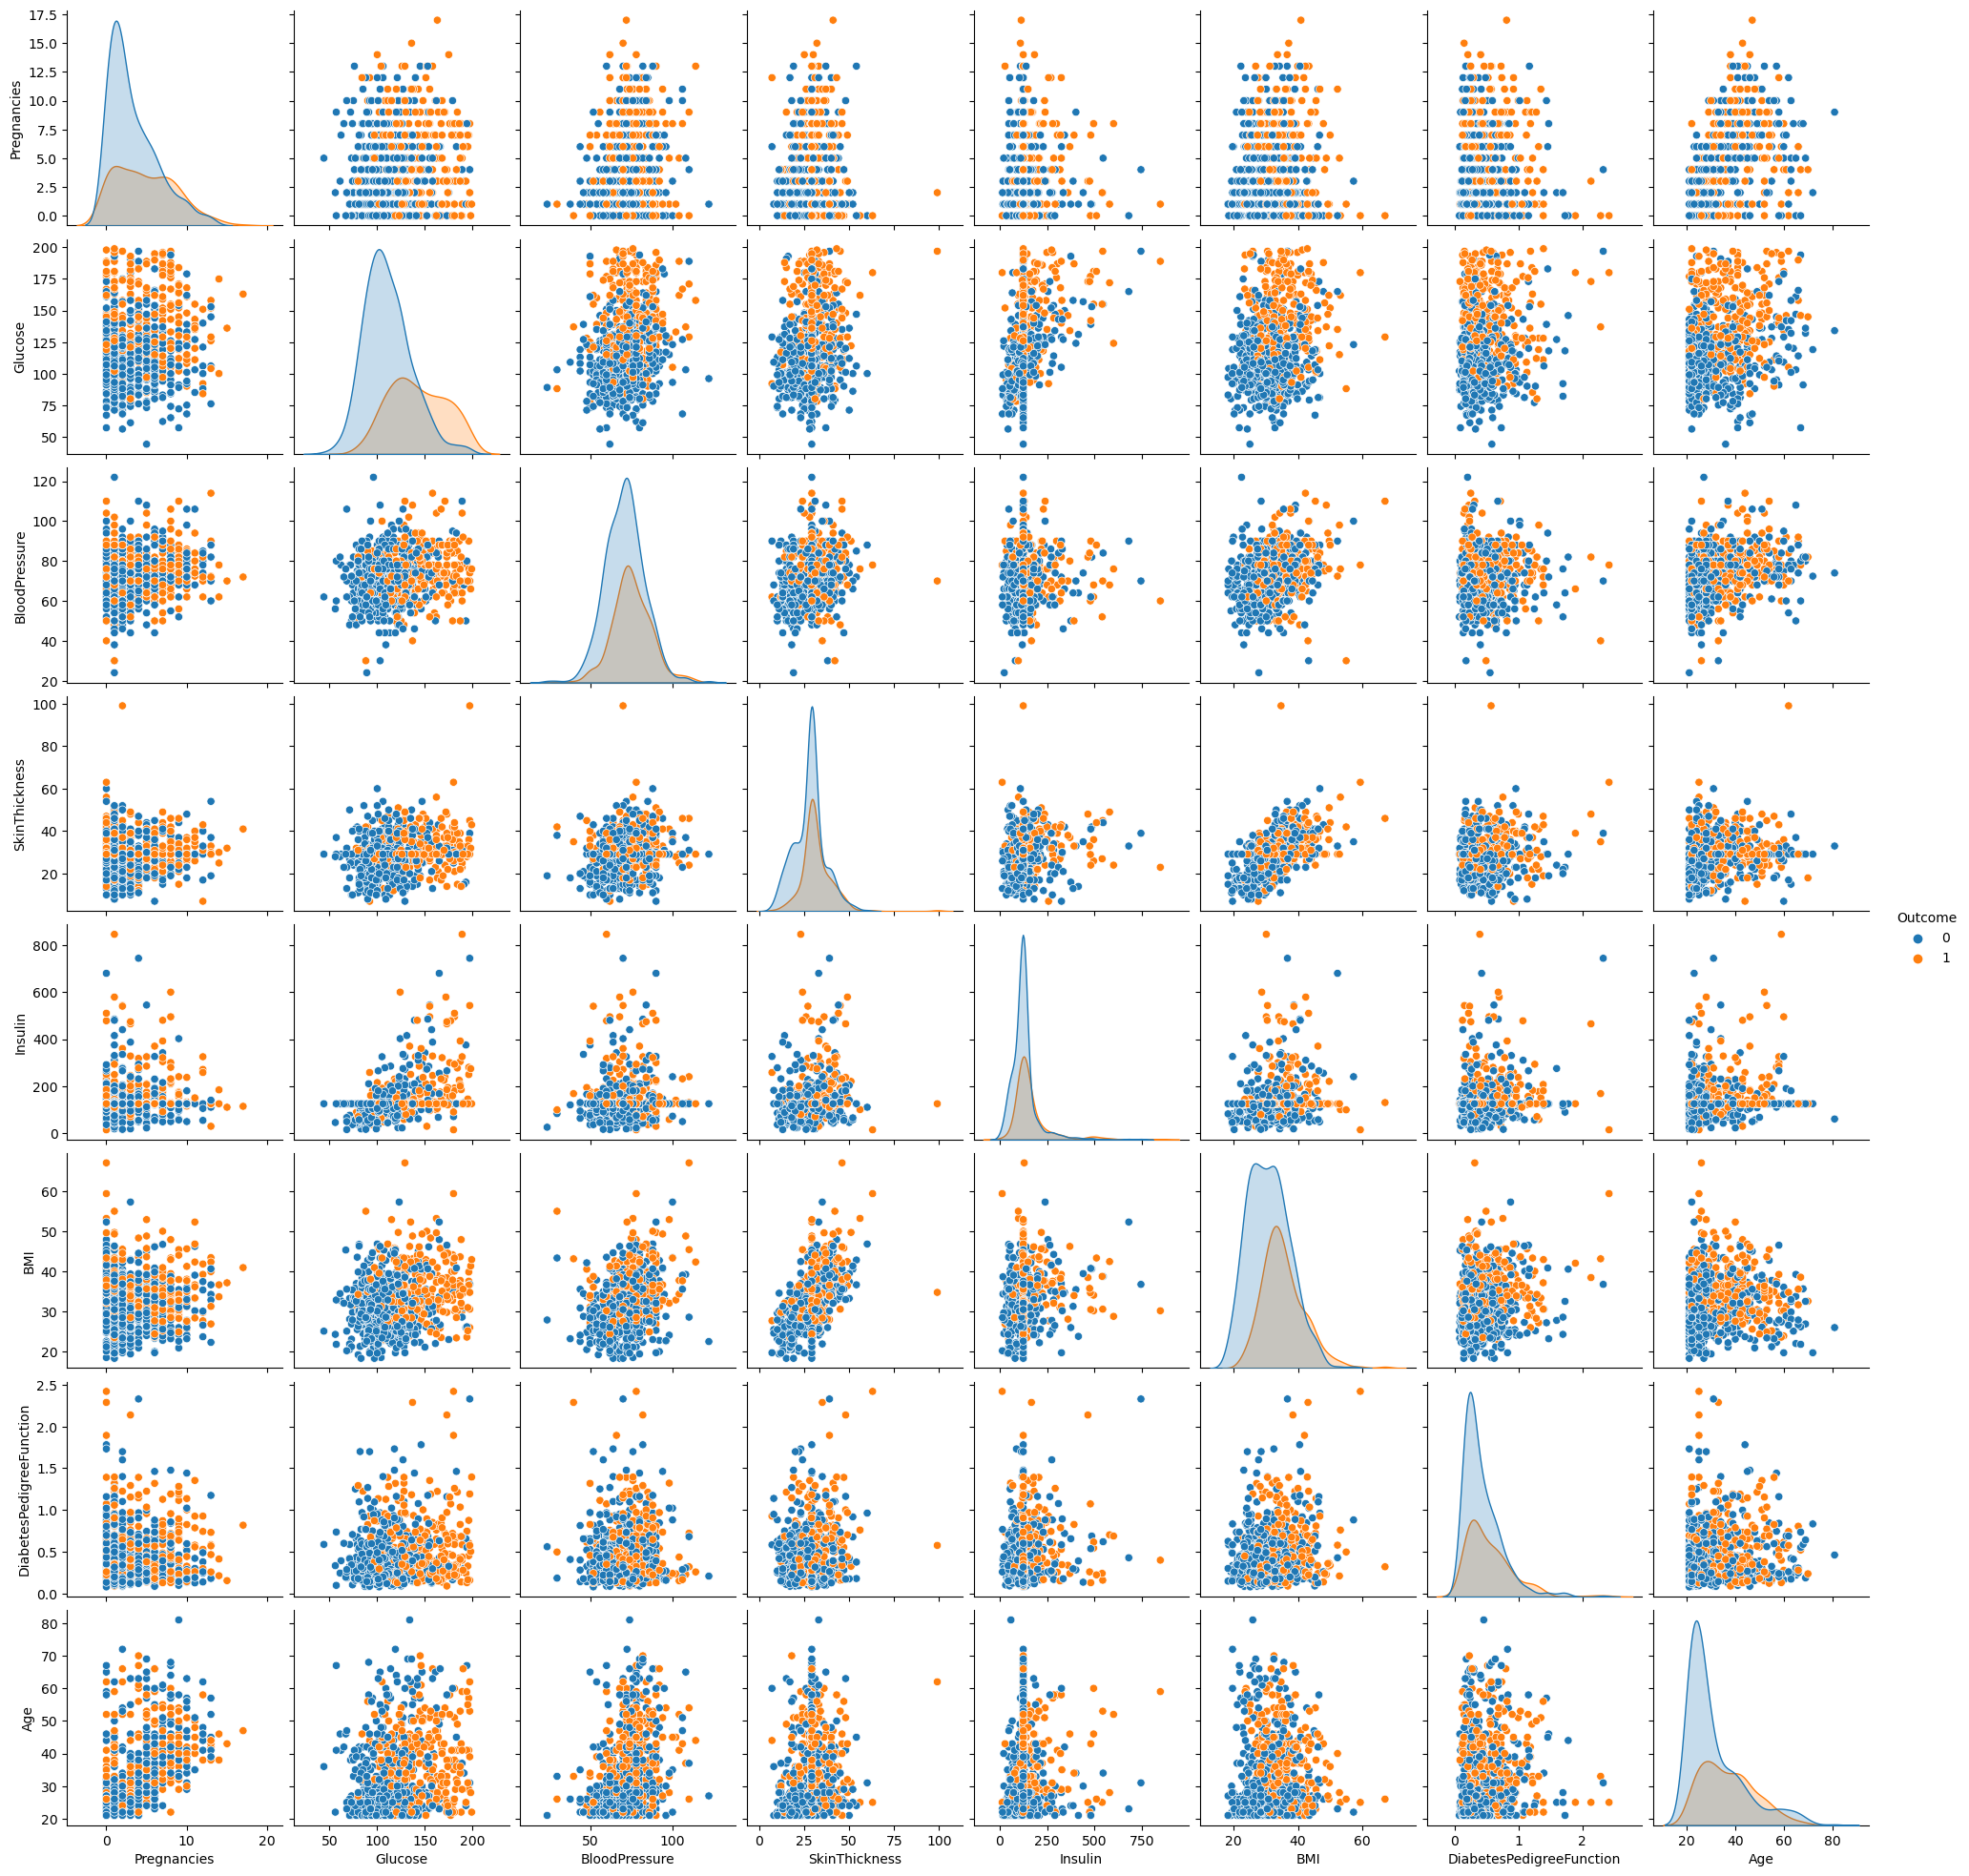

In [17]:
# Creating a pairplot which will create scatterplots comparing all variables. 
# Adding in "hue='Outcome'", will show in the scatterplots which datapoints had diabetes.
sns.pairplot(data, hue='Outcome')

### 6. Perform correlation analysis. Visually explore it using a heat map.

C:\Users\ricky\AppData\Local\Temp\ipykernel_41176\2616473813.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))


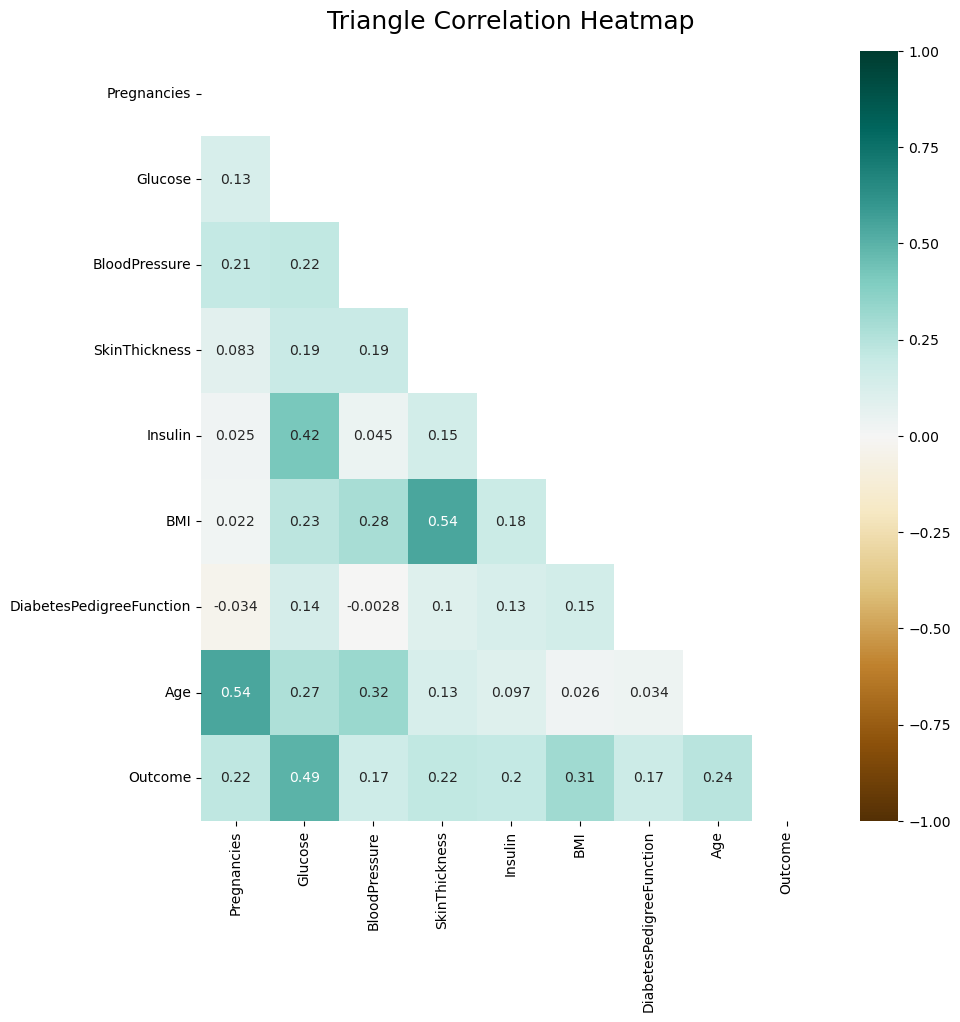

In [18]:
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

From the pairplots and correlation analysis, the following variables appear to be positively correlated:
* SkinThickness and BMI, Age and Pregnancies, and Glucose and Insulin.
* Outcome and Glucose also seems to have a positive correlation which means Glucose could be an important variable.

These identified variables seem to have the strongest correlation although only moderately correlated. The other variables seem to have small or no correlation.

# II. Data Modeling

### 1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

This problem deals with using all the available features to predict if a person has diabetes or not. This is therefore a binary problem. We have several ways to build a binary model for this problem. These models are listed below:

* Logistics Regression
* Naive Bayes classification
* Stochastic Gradient Descent
* K-Nearest Neighbors
* Decision Tree
* Random Forest
* Support Vector Machine

Of the above models, Logistic Regression, Naive Bayes classification, Random Forest and K-Nearest Neighbors will be used. The models will be validated using K-Fold Cross Validation.

### 2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [19]:
# Scaling and Splitting the Data
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, mean_squared_error, roc_auc_score, confusion_matrix, roc_curve, recall_score, precision_score, f1_score 
from sklearn.preprocessing import StandardScaler

In [20]:
# Scaling the features of the data and removing the outcome
X_scaled = StandardScaler().fit_transform(data.drop(['Outcome'], axis='columns'))

In [21]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data.Outcome, random_state=123, test_size=.2)

#### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
# Initializing the logistic regression model
lr_clf= LogisticRegression(class_weight='balanced', random_state=123, max_iter=500)

In [24]:
# Fitting the model to the train data
lr_clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=123)

In [25]:
# Creating the predictions based on the test data
lr_pred = lr_clf.predict(X_test)

In [26]:
# Saving the model evaluation metrics for the logistic regression
lr_model_vals = dict(accuracy=accuracy_score(y_test, lr_pred),
                    auc=roc_auc_score(y_test, lr_pred),
                    recall=recall_score(y_test, lr_pred),
                    precision=precision_score(y_test, lr_pred),
                    f1_score = f1_score(y_test, lr_pred),
                    )

In [27]:
# AUC ROC Curve params computation for Logistic Regression
## This is for the plot of the false positive rate (fpr) vs the true positive rate (tpr) on the logistic regression

In [28]:
y_pred_prob_lr = lr_clf.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr , th_lr = roc_curve(y_test, y_pred_prob_lr)
gmean_lr = np.sqrt(tpr_lr * (1-fpr_lr))
ix_lr = np.argmax(gmean_lr)

In [29]:
# Tuning by AUC_ROC Threshold
## The geometric mean between TPR and FPR is an optimum value which helps predict the correct value.

In [30]:
th_lr[np.argmax(gmean_lr)]

0.3645422879700186

In [31]:
# Based on the above the optimum threshold for our model is 0.3645

In [32]:
# This saves our predictions results with respect to the logistic regression model
y_roc_pred_lr = [0 if pred < th_lr[ix_lr] else 1 for pred in y_pred_prob_lr ]

In [33]:
print("Test classification Report With  tuned threshold")
print(classification_report(y_test, y_roc_pred_lr)  )

print("Test classification Report Without  tuned threshold")
print(classification_report(y_test, lr_pred) )

Test classification Report With  tuned threshold
              precision    recall  f1-score   support

           0       0.94      0.66      0.77        96
           1       0.62      0.93      0.74        58

    accuracy                           0.76       154
   macro avg       0.78      0.79      0.76       154
weighted avg       0.82      0.76      0.76       154

Test classification Report Without  tuned threshold
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        96
           1       0.68      0.72      0.70        58

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154



Above we can see the model results. Our model performs fairly well in terms of accuracy precision and recall. There is room for improvement as the precision for a person with diabetes and recall for a person without diabetes is lower in the tuned model than the untuned model.

In [34]:
## This is for the plot of the false positive rate (fpr) vs the true positive rate (tpr) on the tuned logistic regression
fpr_tlr, tpr_tlr , th_tlr = roc_curve(y_test, y_roc_pred_lr)
gmean_tlr = np.sqrt(tpr_tlr * (1-fpr_tlr))
ix_tlr = np.argmax(gmean_tlr)

In [35]:
# Saving the model evaluation metrics for the logistic regression
tlr_model_vals = dict(accuracy=accuracy_score(y_test, y_roc_pred_lr),
                    auc=roc_auc_score(y_test, y_roc_pred_lr),
                    recall=recall_score(y_test, y_roc_pred_lr),
                    precision=precision_score(y_test, y_roc_pred_lr),
                    f1_score = f1_score(y_test, y_roc_pred_lr),
                    )

#### Naive Bayes Classification

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
# Initializing the Naive Bayes (NB)
gnb_clf = GaussianNB()

In [38]:
# Fitting the NB model with the train data
gnb_clf.fit(X_train, y_train)

GaussianNB()

In [39]:
# Making predictions on the test data
gnb_pred = gnb_clf.predict(X_test)

In [40]:
# Saving the evaluation metrics for the NB model
gnb_model_vals = dict(accuracy=accuracy_score(y_test, gnb_pred),
                    auc=roc_auc_score(y_test, gnb_pred),
                    recall=recall_score(y_test, gnb_pred),
                    precision=precision_score(y_test, gnb_pred),
                    f1_score = f1_score(y_test, gnb_pred),
                    )

In [41]:
# AUC ROC for Naive Bayes classifier
## This is for the plot of the false positive rate (fpr) vs the true positive rate (tpr) on the NB

In [42]:
y_pred_prob_gnb = gnb_clf.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb , th_nb = roc_curve(y_test, y_pred_prob_gnb)
gmean_nb = np.sqrt(tpr_nb * (1-fpr_nb))
ix_nb = np.argmax(gmean_nb)

In [43]:
print("Train Classification Report")
print(classification_report(y_train, gnb_clf.predict(X_train))  )

Train Classification Report
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       404
           1       0.64      0.59      0.61       210

    accuracy                           0.74       614
   macro avg       0.72      0.71      0.71       614
weighted avg       0.74      0.74      0.74       614



In [44]:
print("Test Classification Report")
print(classification_report(y_test, gnb_clf.predict(X_test))  )

Test Classification Report
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        96
           1       0.70      0.64      0.67        58

    accuracy                           0.76       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



From the above Test Classification report, the model performs similarly in accuracy as the logistic regression.

#### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Initializing the Random Forest (RF) model
rf_clf = RandomForestClassifier()

In [47]:
# Fitting the model with train data
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
# Making predictions on Test Data
rf_pred = rf_clf.predict(X_test)

In [49]:
# Saving the model evaluation metrics for the RF model
rf_model_vals = dict(accuracy=accuracy_score(y_test, rf_pred),
                    auc=roc_auc_score(y_test, rf_pred),
                    recall=recall_score(y_test, rf_pred),
                    precision=precision_score(y_test, rf_pred),
                    f1_score = f1_score(y_test, rf_pred),
                    )

In [50]:
# AUC ROC for Random Forest
## This is for the plot of the false positive rate (fpr) vs the true positive rate (tpr) on the RF
y_pred_prob_rf = rf_clf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf , th_rf = roc_curve(y_test, y_pred_prob_rf)
gmean_rf = np.sqrt(tpr_rf * (1-fpr_rf))
ix_rf = np.argmax(gmean_rf)

In [51]:
print("\t\tTrain Classification Report\n")
print(classification_report(y_train, rf_clf.predict(X_train))  )

		Train Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       1.00      1.00      1.00       210

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [52]:
print("\t\tTest Classification Report\n")
print(classification_report(y_test, rf_clf.predict(X_test))  )

		Test Classification Report

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        96
           1       0.73      0.69      0.71        58

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.78      0.79      0.78       154



From the classification report above on Random Forest Training data, the Random forest model has overfitted. This can be seen since it has 100% accuracy on training data, yet only 80% accuracy on Test data. While this is still good accuracy, this can be improved upon to remove the overfitting.

In [53]:
# The following code helps correct overfitting for the random forest model.

In [54]:
alphas=[]
test=[]
train=[]
for alpha in np.linspace(.03, .05, 10):
    rf = RandomForestClassifier(ccp_alpha=alpha, random_state=123)
    rf.fit(X_train, y_train)
    y_train_predicted = rf.predict(X_train)
    y_test_predicted = rf.predict(X_test)
    mse_train = mean_squared_error(y_train, y_train_predicted)
    mse_test = mean_squared_error(y_test, y_test_predicted)
    alphas.append(alpha)
    test.append(mse_test)
    train.append(mse_train)
    print("Alpha: {} Train mse: {} Test mse: {}".format(alpha, mse_train, mse_test))
    
score=pd.DataFrame({'alpha': alphas, 'test':test, 'train': train})

Alpha: 0.03 Train mse: 0.2719869706840391 Test mse: 0.2662337662337662
Alpha: 0.03222222222222222 Train mse: 0.2768729641693811 Test mse: 0.2792207792207792
Alpha: 0.034444444444444444 Train mse: 0.28338762214983715 Test mse: 0.2857142857142857
Alpha: 0.03666666666666667 Train mse: 0.2947882736156352 Test mse: 0.2857142857142857
Alpha: 0.03888888888888889 Train mse: 0.3241042345276873 Test mse: 0.35714285714285715
Alpha: 0.04111111111111111 Train mse: 0.34201954397394135 Test mse: 0.37662337662337664
Alpha: 0.043333333333333335 Train mse: 0.34201954397394135 Test mse: 0.37662337662337664
Alpha: 0.04555555555555556 Train mse: 0.34201954397394135 Test mse: 0.37662337662337664
Alpha: 0.04777777777777778 Train mse: 0.34201954397394135 Test mse: 0.37662337662337664
Alpha: 0.05 Train mse: 0.34201954397394135 Test mse: 0.37662337662337664


Text(0, 0.5, 'Error')

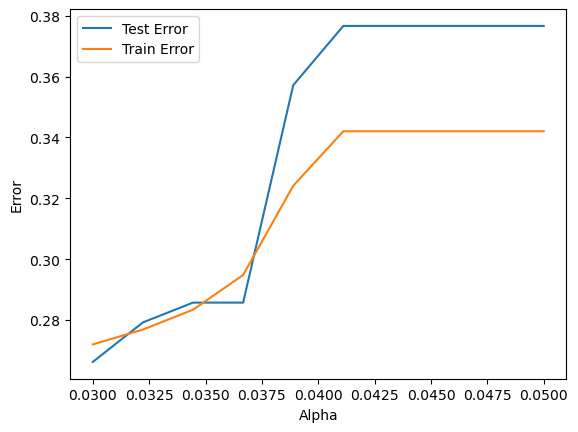

In [55]:
plt.plot(score.alpha, score.test)
plt.plot(score.alpha, score.train)
plt.legend(['Test Error', 'Train Error'])
plt.xlabel('Alpha')
plt.ylabel('Error')

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
# Create the random grid
random_grid = { 'ccp_alpha': np.linspace(.03, .05, 10),
                'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(5, 55, num = 10)], 
               'min_samples_split': [5, 10, 12], 
               'min_samples_leaf': [3,5,7,10],
               }

In [58]:
# This code runs the parameters listed above to help find the best fit for the model.
rf_clf_cv = RandomForestClassifier(class_weight="balanced", random_state=123)
rscv = RandomizedSearchCV(estimator=rf_clf_cv, param_distributions=random_grid, cv=3, scoring='f1_weighted')

In [59]:
rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=123),
                   param_distributions={'ccp_alpha': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                                        'max_depth': [5, 10, 16, 21, 27, 32, 38,
                                                      43, 49, 55],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [3, 5, 7, 10],
                                        'min_samples_split': [5, 10, 12],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   scoring='f1_weighted')

In [60]:
# This is the result of the above showing the best parameters for the RF model
rscv.best_estimator_

RandomForestClassifier(ccp_alpha=0.03888888888888889, class_weight='balanced',
                       max_depth=49, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=800, random_state=123)

In [61]:
print("\t\tTest Classification Report\n")
print(classification_report(y_test, rscv.predict(X_test))  )

		Test Classification Report

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        96
           1       0.69      0.79      0.74        58

    accuracy                           0.79       154
   macro avg       0.77      0.79      0.78       154
weighted avg       0.80      0.79      0.79       154



Observation: ccp_alpha is 0.03

This model has a higher accuracy than the untuned RF model.

In [62]:
print("\t\tTrain Classification Report\n")
print(classification_report(y_train, rscv.predict(X_train))  )

		Train Classification Report

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       404
           1       0.63      0.78      0.70       210

    accuracy                           0.77       614
   macro avg       0.75      0.77      0.76       614
weighted avg       0.79      0.77      0.77       614



In [63]:
# Saving the model evaluation metrics for the Tuned RF model
tuned_rf_model_vals = dict(accuracy=accuracy_score(y_test, rscv.predict(X_test)),
                    auc=roc_auc_score(y_test, rscv.predict(X_test)),
                    recall=recall_score(y_test, rscv.predict(X_test)),
                    precision=precision_score(y_test, rscv.predict(X_test)),
                    f1_score = f1_score(y_test, rscv.predict(X_test)),
                    )

In [64]:
# AUC ROC for Tuned Random Forest
## This is for the plot of the false positive rate (fpr) vs the true positive rate (tpr) on the Tuned RF
y_pred_prob_trf = rscv.predict_proba(X_test)[:, 1]
fpr_trf, tpr_trf , th_trf = roc_curve(y_test, y_pred_prob_trf)
gmean_trf = np.sqrt(tpr_trf * (1-fpr_trf))
ix_trf = np.argmax(gmean_trf)

In [65]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

#### K Nearest Neighbor

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
# Using rmse, error_rate and accuracy to plot them to observe nearest neighbors. 
nbr = []
error_rmse = []
error_rate = []
accuracy = []
for n in range(2, 50):
    knn_clf = KNeighborsClassifier(n_neighbors=n, weights='distance')
    knn_clf.fit(X_train, y_train)
    pred = knn_clf.predict(X_test)
    
    nbr.append(n)
    error_rmse.append(mean_squared_error(y_test, pred, squared=False))
    error_rate.append(np.mean(y_test != pred))
    accuracy.append(accuracy_score(y_test, pred))
    
knn_stats = pd.DataFrame({'neighbor': nbr, 'rmse': error_rmse, 'error_rate': error_rate, 'accuracy': accuracy})      

<AxesSubplot:xlabel='neighbor', ylabel='error_rate'>

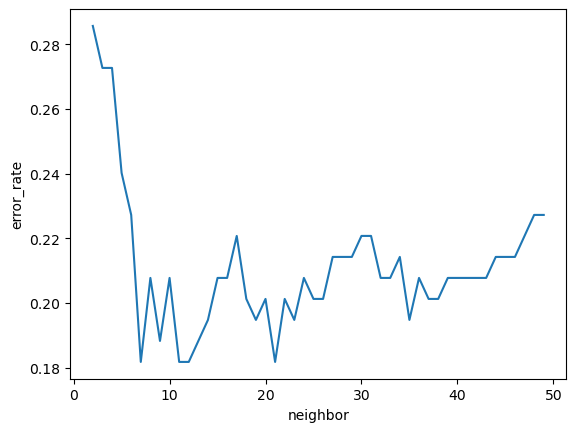

In [68]:
# Plotting error rate by neighbor
sns.lineplot(x='neighbor', y='error_rate', data=knn_stats)

<AxesSubplot:xlabel='neighbor', ylabel='rmse'>

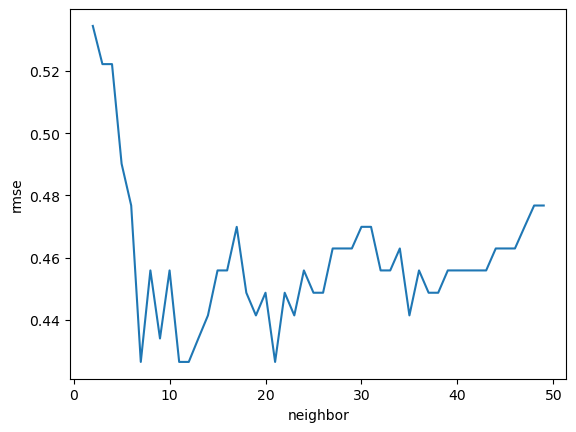

In [69]:
# Plotting rmse by neighbor
sns.lineplot(x='neighbor', y='rmse', data=knn_stats)

<AxesSubplot:xlabel='neighbor', ylabel='accuracy'>

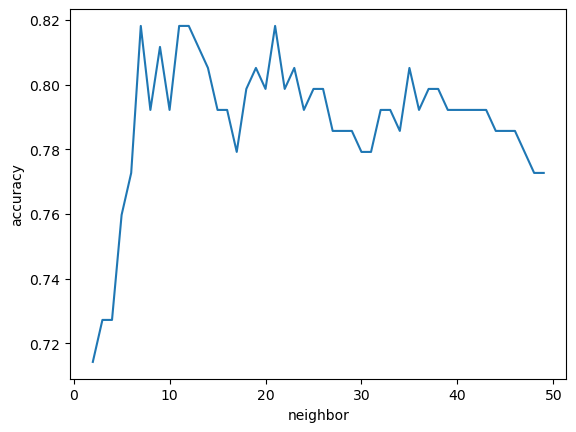

In [70]:
# Plotting accuracy by neighbor
sns.lineplot(x='neighbor', y='accuracy', data=knn_stats)

From the above plots, error_rate and rmse show an identical plot while the accuracy plot seems to be the inverse.

In [71]:
# This code brings the neighbor amount that has the lowest rmse.
knn_stats.neighbor[knn_stats.rmse.argmin()]

7

In [72]:
# From this we see the neighbor amounts with the highest accuracy is 7, 11, 12, 21.
knn_stats.sort_values("accuracy", ascending=False)

,neighbor,rmse,error_rate,accuracy
5,7,0.426401,0.181818,0.818182
9,11,0.426401,0.181818,0.818182
10,12,0.426401,0.181818,0.818182
19,21,0.426401,0.181818,0.818182
7,9,0.433949,0.188312,0.811688
11,13,0.433949,0.188312,0.811688
21,23,0.441367,0.194805,0.805195
33,35,0.441367,0.194805,0.805195
12,14,0.441367,0.194805,0.805195
17,19,0.441367,0.194805,0.805195


In [73]:
# Initializing the model with 7 neighbors, fitting the model, and making predictions based on test data.
knn_clf = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)

In [74]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        96
           1       0.78      0.55      0.65        58

    accuracy                           0.77       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154



This model has a similar accuracy score as the other models.

In [75]:
# Saving the model evaluation metrics for the KNN model
knn_model_vals = dict(accuracy=accuracy_score(y_test, knn_pred),
                    auc=roc_auc_score(y_test, knn_pred),
                    recall=recall_score(y_test, knn_pred),
                    precision=precision_score(y_test, knn_pred),
                    f1_score = f1_score(y_test, knn_pred),
                    )

In [76]:
# AUC ROC for KNN
## This is for the plot of the false positive rate (fpr) vs the true positive rate (tpr) on the KNN
y_pred_prob_trf = rscv.predict_proba(X_test)[:, 1]
y_pred_prob_knn = knn_clf.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn , th_knn = roc_curve(y_test, y_pred_prob_knn)
gmean_knn = np.sqrt(tpr_knn * (1-fpr_knn))
ix_knn = np.argmax(gmean_knn)

#### Tuning KNN

In [77]:
# Here we are using the neighbor amounts that returned the highest accuracy and lowest RMSE.
knn_param_grid = {'n_neighbors' : [7, 11, 12, 21],
                      'weights': ['distance', 'uniform'],
                      'algorithm' : ['ball_tree', 'kd_tree'],
                     'leaf_size' :[30,40,50],                 
                 }

In [78]:
# This code runs the parameters listed above to help find the best fit for the model.
knn_rscv = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=knn_param_grid, cv=3, scoring='f1_weighted')

In [79]:
# Fitting the model with the train data
knn_rscv.fit(X_train, y_train)

C:\Users\ricky\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ricky\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree'],
                                        'leaf_size': [30, 40, 50],
                                        'n_neighbors': [7, 11, 12, 21],
                                        'weights': ['distance', 'uniform']},
                   scoring='f1_weighted')

In [80]:
# This shows the best parameters for the model
knn_rscv.best_params_

{'weights': 'uniform',
 'n_neighbors': 11,
 'leaf_size': 30,
 'algorithm': 'ball_tree'}

In [81]:
# Making predictions with the tuned model
tknn_pred = knn_rscv.predict(X_test)

C:\Users\ricky\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [82]:
# AUC ROC for Tuned KNN
## This is for the plot of the false positive rate (fpr) vs the true positive rate (tpr) on the Tuned KNN
y_pred_prob_knn_cv = knn_rscv.predict_proba(X_test)[:, 1]
fpr_tknn, tpr_tknn , th_tknn = roc_curve(y_test, y_pred_prob_knn_cv)
gmean_tknn = np.sqrt(tpr_tknn * (1-fpr_tknn))
ix_tknn = np.argmax(gmean_tknn)

In [83]:
# This code shows the accuracy increased for the tuned model
accuracy_score(y_test, tknn_pred)

0.8311688311688312

In [84]:
# Saving the model evaluation metrics for the Tuned KNN model
tknn_model_vals = dict(accuracy=accuracy_score(y_test, tknn_pred),
                    auc=roc_auc_score(y_test, tknn_pred),
                    recall=recall_score(y_test, tknn_pred),
                    precision=precision_score(y_test, tknn_pred),
                    f1_score = f1_score(y_test, tknn_pred),
                    )

### 3. Compare various models with the results from KNN algorithm.
### 4. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameters you have used.

In [85]:
# AUC ROC Curve of all the models put together

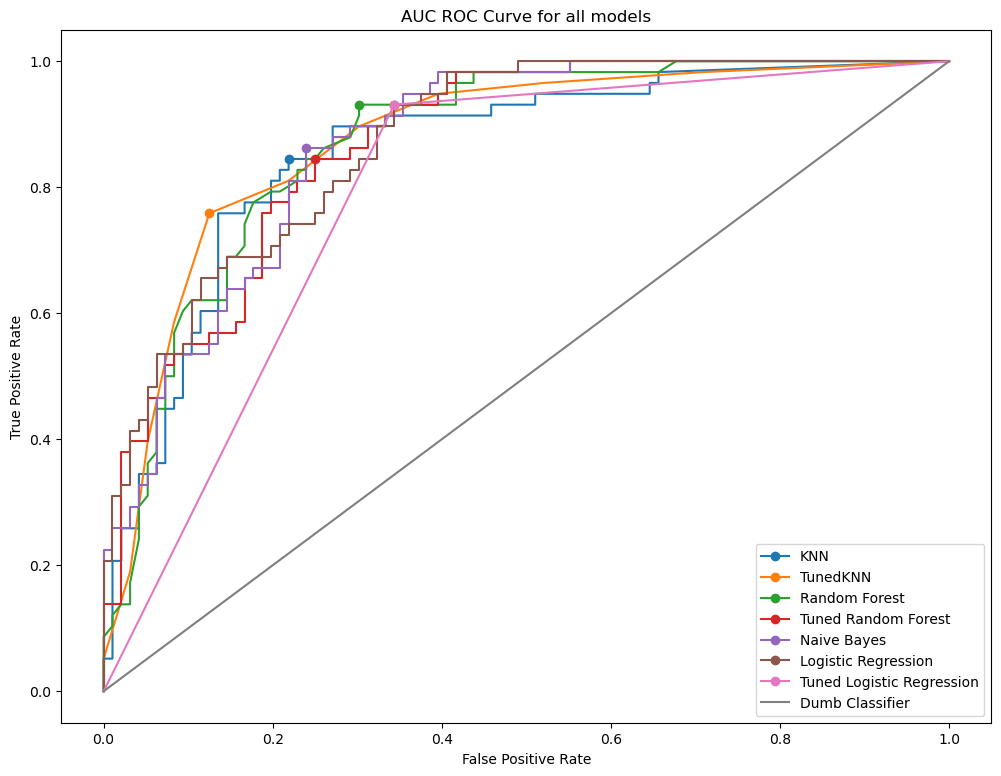

In [86]:
# This code plots the auc_roc of all the models together. 
plt.subplots(figsize=(12,9))
plt.plot(fpr_knn, tpr_knn, marker='o', markevery=[ix_knn])
plt.plot(fpr_tknn, tpr_tknn, marker='o', markevery=[ix_tknn])
plt.plot(fpr_rf, tpr_rf, marker='o', markevery=[ix_rf])
plt.plot(fpr_trf, tpr_trf, marker='o', markevery=[ix_trf])
plt.plot(fpr_nb, tpr_nb, marker='o', markevery=[ix_nb])
plt.plot(fpr_lr, tpr_lr, marker='o', markevery=[ix_lr])
plt.plot(fpr_tlr, tpr_tlr, marker='o', markevery=[ix_tlr])
plt.plot([0,1], [0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC ROC Curve for all models')
plt.legend(['KNN', 'TunedKNN', 'Random Forest', 'Tuned Random Forest', 'Naive Bayes', 'Logistic Regression',  'Tuned Logistic Regression','Dumb Classifier'])
plt.show()

# Comparing Model Parameters

In [88]:
# The following code plots the accuracy, auc, recall, precision and f1_score of all models.
model_stats = pd.DataFrame(data=[lr_model_vals, tlr_model_vals, gnb_model_vals, rf_model_vals, 
                                 tuned_rf_model_vals, knn_model_vals, tknn_model_vals ], 
                           index=['LogReg', 'Tuned LogReg auc_roc', 'naive_bayes', 'random_forest', 
                                  'tuned_random_forest ', 'knn', 'tuned knn'])

<AxesSubplot:>

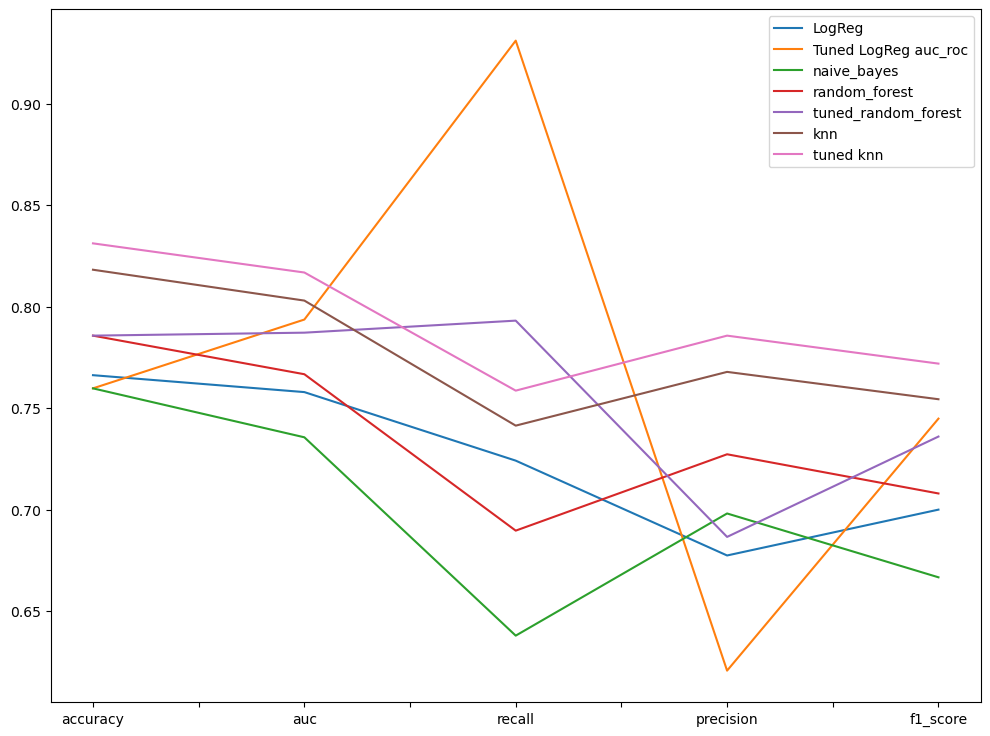

In [89]:
model_stats.T.plot(kind='line', figsize=(12,9))

From the above:
* The KNN model has the best overall performance and the tuned model performs better across all parameters. 
* The tuned Logistic Regression model has the highest recall and the lowest precision. This is the most sensitive model. 
* The Naive Bayes model looks to have performed the worst from all the models.
* The random forest model had the second highest accuracy and after tuning its recall increased and precision decreased.

# Final Model
## Looking at the three tuned models (excluding NB).

In [90]:
final_models = pd.DataFrame(data=[ tlr_model_vals, tuned_rf_model_vals,  tknn_model_vals ], 
                           index=['Logistic Regression',  'Random Forest', 'KNN'])

<AxesSubplot:>

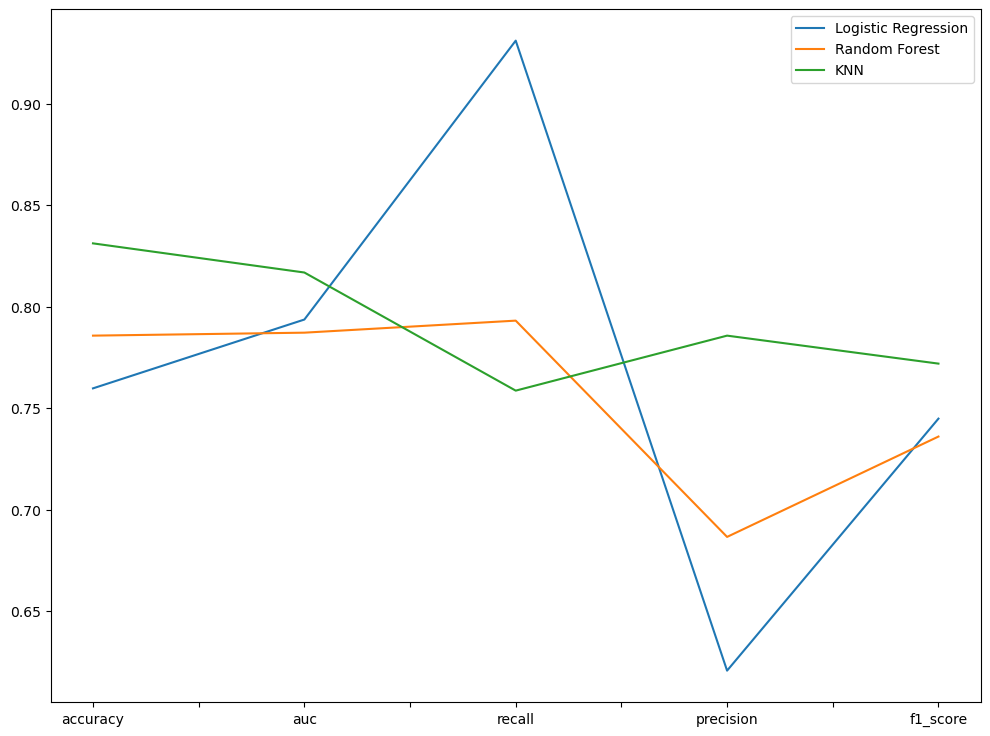

In [114]:
final_models.T.plot(kind='line', figsize=(12,9))

In [113]:
final_models.T

,Logistic Regression,Random Forest,KNN
accuracy,0.759740,0.785714,0.831169
auc,0.793642,0.787177,0.816810
recall,0.931034,0.793103,0.758621
precision,0.620690,0.686567,0.785714
f1_score,0.744828,0.736000,0.771930


From the above the KNN seems to be the best overall model since it has the highest accuracy and highest precision. It also compares well among the other metrics.

The Logistic Regression model can also be used when high sensitivity is preferred.

Tableau Dashboard:
https://public.tableau.com/app/profile/ricardo.delgado4298/viz/CapstoneProject2-Healthcare-RicardoDelgado/Dashboard1